In [1]:
import pypsa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline
from pypsa.linopf import (get_var, define_constraints, linexpr, join_exprs,
                          network_lopf, ilopf)

In [2]:
basedir = "../" 
#basedir = "~/mnt/lin/pypsa-eur/"

In [3]:
# Perfect foresight:  sovled network
n2013 = pypsa.Network(basedir + "networks/2013_de/elec_s_3_ec_lv1.0_Co2L0p0-3H.nc")

/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_3_ec_lv1.0_Co2L0p0-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [4]:
# Perfect foresight:  sovled network
n_solved = pypsa.Network(basedir + "results/networks/2013_de/elec_s_3_ec_lv1.0_Co2L0p0-3H.nc")

/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_3_ec_lv1.0_Co2L0p0-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [5]:
# Perfect foresight:  sovled operation network
n_op = pypsa.Network(basedir + "results/networks/2013_de/elec_s_3_ec_lv1.0_Co2L0p0-3H_op.nc")

/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_3_ec_lv1.0_Co2L0p0-3H_op.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [6]:
# rolling horizon, without setting bidding price
n_de_rh = pypsa.Network(basedir + "results/networks/2013_de/elec_s_3_ec_lv1.0_Co2L0p0-3H__rh.nc")

/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_3_ec_lv1.0_Co2L0p0-3H__rh.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [19]:
## rolling horizon for two weeks and one week overlap
n_rh_all_2w = pypsa.Network(basedir + "results/networks/2013_de/elec_s_3_ec_lv1.0_Co2L0p0-3H_all_rh.nc")

/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_3_ec_lv1.0_Co2L0p0-3H_all_rh.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [20]:
n_rh_all_2w.links.p_nom

,DE0 0 H2 Electrolysis,DE0 0 H2 Fuel Cell,DE0 1 H2 Electrolysis,DE0 1 H2 Fuel Cell,DE0 2 H2 Electrolysis,DE0 2 H2 Fuel Cell,DE0 0 battery charger,DE0 0 battery discharger,DE0 1 battery charger,DE0 1 battery discharger,DE0 2 battery charger,DE0 2 battery discharger,DE0 0 PHS charger,DE0 0 PHS discharger,DE0 1 PHS charger,DE0 1 PHS discharger,DE0 2 PHS charger,DE0 2 PHS discharger,DE0 0 hydro discharger,DE0 2 hydro discharger
name,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,-0.024697,0.030871,-0.024697,0.030871,-0.024697,0.030871,-0.023774,0.026415,-0.023635,0.026261,-0.023732,0.026369,-0.024442,0.028223,-0.024442,0.028223,-0.024442,0.028223,0.022227,0.022227
2013-01-01 03:00:00,-0.024697,0.030871,-0.024697,0.030871,-0.024697,0.030871,-0.023777,0.026418,-0.023638,0.026264,-0.023735,0.026372,-0.024446,0.028228,-0.024446,0.028228,-0.024446,0.028228,0.022227,0.022227
2013-01-01 06:00:00,-0.024697,0.030871,-0.024697,0.030871,-0.024697,0.030871,-0.023780,0.026422,-0.023641,0.026268,-0.023738,0.026375,-0.024451,0.028233,-0.024450,0.028233,-0.024450,0.028233,0.022227,0.022227
2013-01-01 09:00:00,-0.024697,0.030871,-0.024697,0.030871,-0.024697,0.030871,-0.023784,0.026426,-0.023645,0.026272,-0.023742,0.026379,-0.024456,0.028239,-0.024455,0.028238,-0.024455,0.028238,0.022227,0.022227
2013-01-01 12:00:00,-0.024697,0.030871,-0.024697,0.030871,-0.024697,0.030871,-0.023787,0.026431,-0.023649,0.026277,-0.023746,0.026384,-0.024460,0.028244,-0.024459,0.028243,-0.024459,0.028243,0.022227,0.022227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 09:00:00,-0.024697,0.030871,-0.024697,0.030871,-0.024697,0.030871,-0.023770,0.026411,-0.023628,0.026253,-0.023728,0.026364,-0.024425,0.028203,-0.024425,0.028203,-0.024425,0.028203,0.022227,0.022227
2013-12-31 12:00:00,-0.024697,0.030871,-0.024697,0.030871,-0.024697,0.030871,-0.023770,0.026411,-0.023628,0.026253,-0.023728,0.026364,-0.024425,0.028203,-0.024425,0.028203,-0.024425,0.028203,0.022227,0.022227
2013-12-31 15:00:00,-0.024697,0.030871,-0.024697,0.030871,-0.024697,0.030871,-0.023770,0.026411,-0.023628,0.026254,-0.023728,0.026364,-0.024429,0.028208,-0.024429,0.028208,-0.024429,0.028208,0.022227,0.022227


In [17]:
## rolling horizon for two weeks and one week overlap
n_rh_all_3h = pypsa.Network(basedir + "results/networks/2013_de/elec_s_3_ec_lv1.0_Co2L0p0-3H_all_rh_3h.nc")

/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/Users/linyang/opt/anaconda3/envs/pypsa-eur-sp/lib/python3.7/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_3_ec_lv1.0_Co2L0p0-3H_all_rh_3h.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


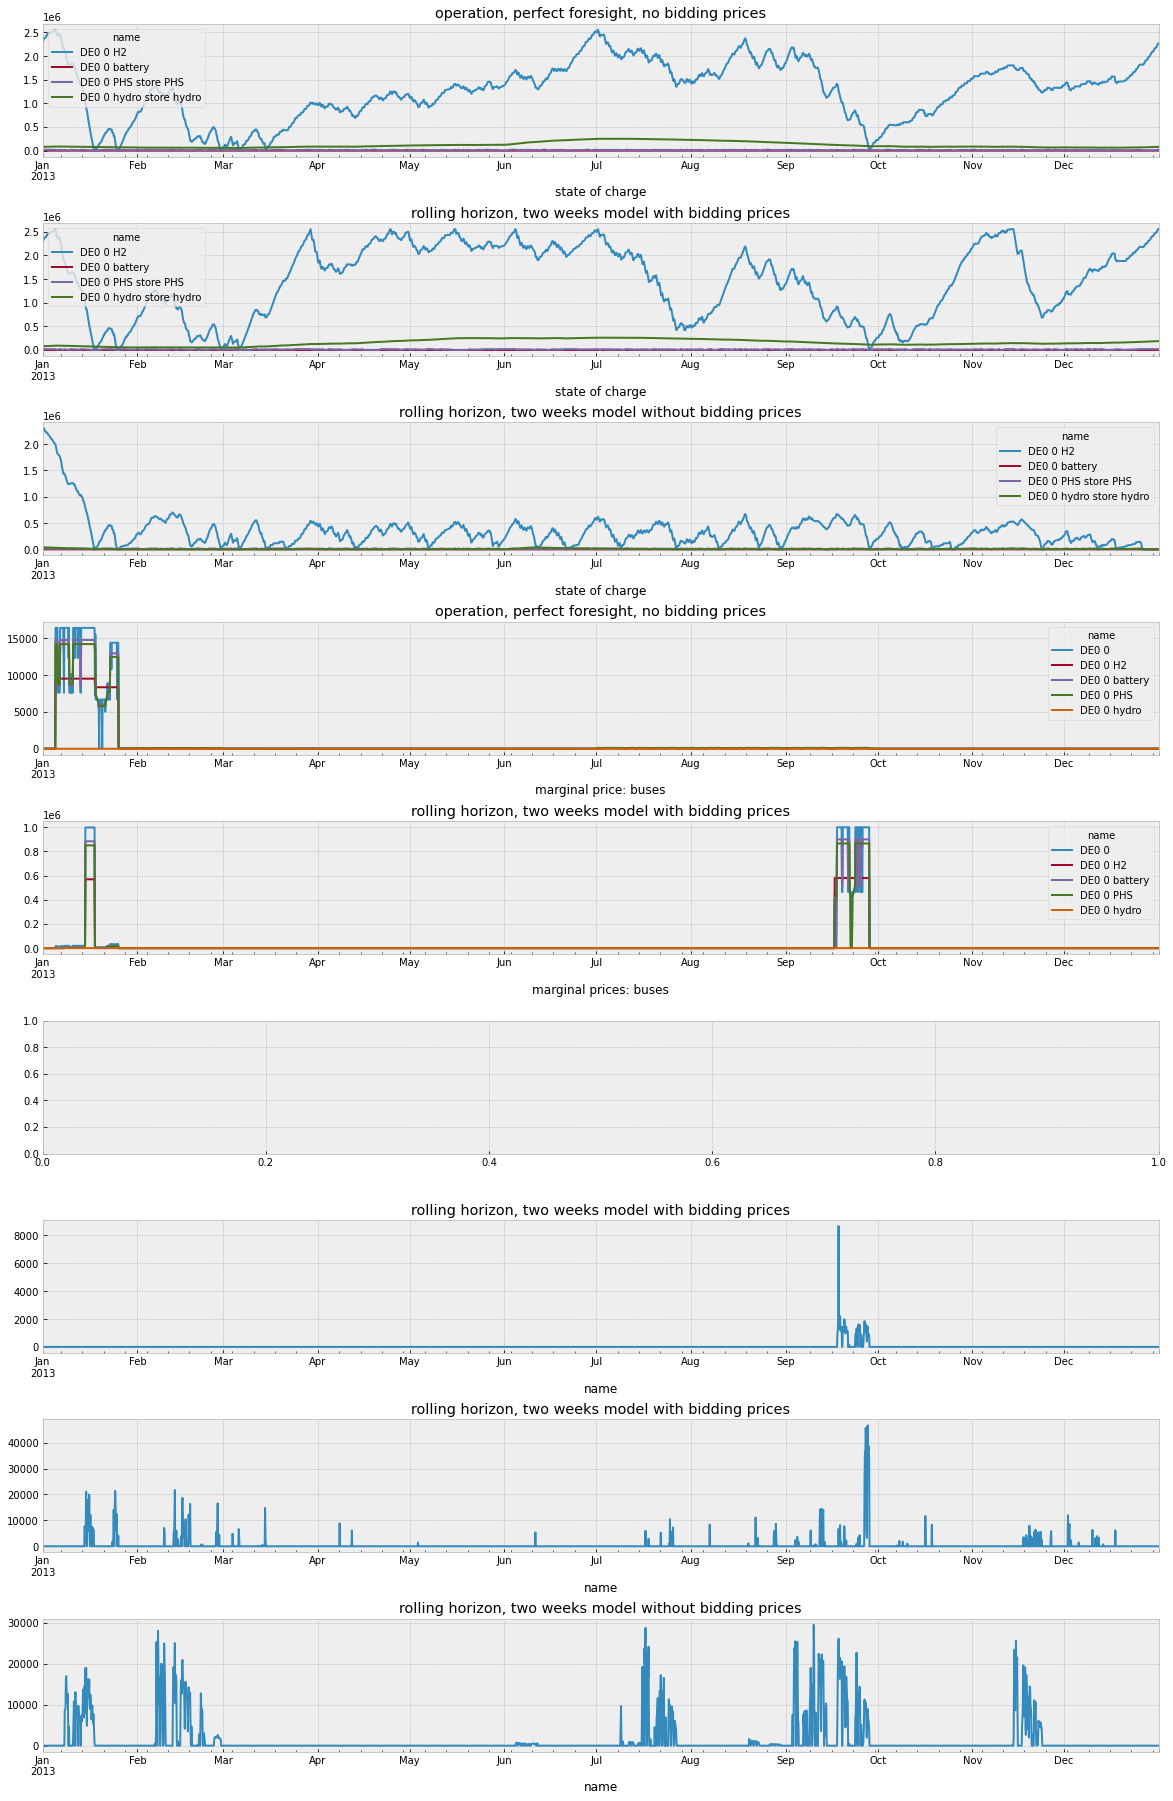

In [18]:
where='2013'

fig, (ax1,ax2,ax3,ax4,ax5, ax6, ax7, ax8, ax9) = plt.subplots(9,1, figsize=(20,30))
plt.subplots_adjust(top = 0.9, bottom=0.1, hspace=.5, wspace=0)

n_op.stores_t.e.filter(like='DE0 0').loc[where].plot(ax=ax1)
ax1.set_title('operation, perfect foresight, no bidding prices')
ax1.set_xlabel('state of charge')

n_rh_all_2w.stores_t.e.filter(like='DE0 0').loc[where].plot(ax=ax2)
ax2.set_title('rolling horizon, two weeks model with bidding prices')
ax2.set_xlabel('state of charge')

n_de_rh.stores_t.e.filter(like='DE0 0').loc[where].plot(ax=ax3)
ax3.set_title('rolling horizon, two weeks model without bidding prices')
ax3.set_xlabel('state of charge')

n_op.buses_t.marginal_price.filter(like='DE0 0').loc[where, :].plot(ax=ax4)
ax4.set_title('operation, perfect foresight, no bidding prices')
ax4.set_xlabel('marginal price: buses')


n_rh_all_2w.buses_t.marginal_price.filter(like='DE0 0').loc[where].plot(ax=ax5)
ax5.set_title('rolling horizon, two weeks model with bidding prices')
ax5.set_xlabel('marginal prices: buses')

n=n_rh_all_2w
n.generators_t.p[n.generators.index[n.generators.carrier == "load"]].sum(axis=1).plot(ax=ax7)
ax7.set_title('rolling horizon, two weeks model with bidding prices')

n=n_rh_all_3h
n.generators_t.p[n.generators.index[n.generators.carrier == "load"]].sum(axis=1).plot(ax=ax8)
ax8.set_title('rolling horizon, two weeks model with bidding prices')

n=n_de_rh
n.generators_t.p[n.generators.index[n.generators.carrier == "load"]].sum(axis=1).plot(ax=ax9)
ax9.set_title('rolling horizon, two weeks model without bidding prices')

#fig.savefig(f'../plots/01-operation.jpeg')
plt.show()

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


<AxesSubplot:xlabel='name'>

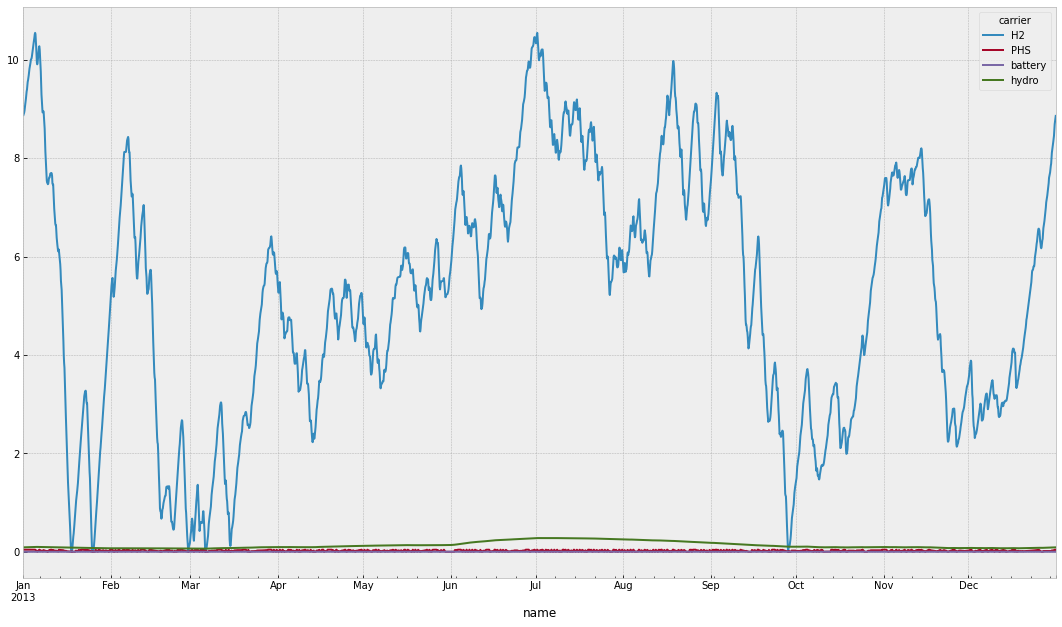

In [9]:
n = n_op

fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5, forward=True)

e = pd.concat((n.stores_t.e.groupby(n.stores.carrier,axis=1).sum(),
               n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier,axis=1).sum()),axis=1)

e = e/1e6
#e.drop(e.columns[e.abs().max() < 1e6],axis=1,inplace=True)

e.plot(ax=ax)

<AxesSubplot:xlabel='name'>

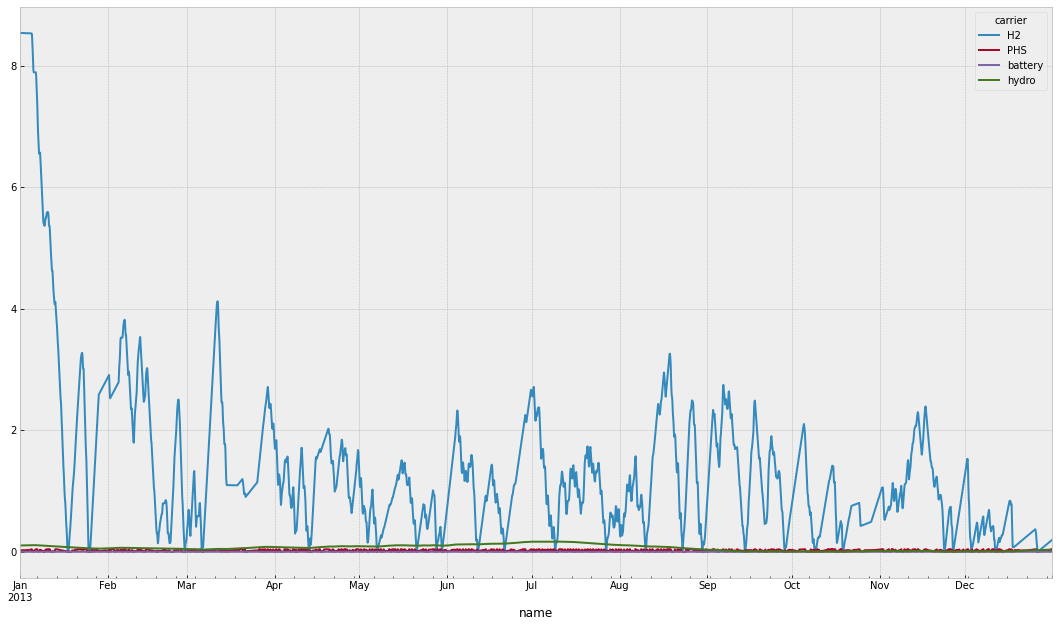

In [10]:
n = n_rh_sp_2w

fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5, forward=True)

e = pd.concat((n.stores_t.e.groupby(n.stores.carrier,axis=1).sum(),
               n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier,axis=1).sum()),axis=1)

e = e/1e6
#e.drop(e.columns[e.abs().max() < 1e6],axis=1,inplace=True)

e.plot(ax=ax)

<AxesSubplot:xlabel='name'>

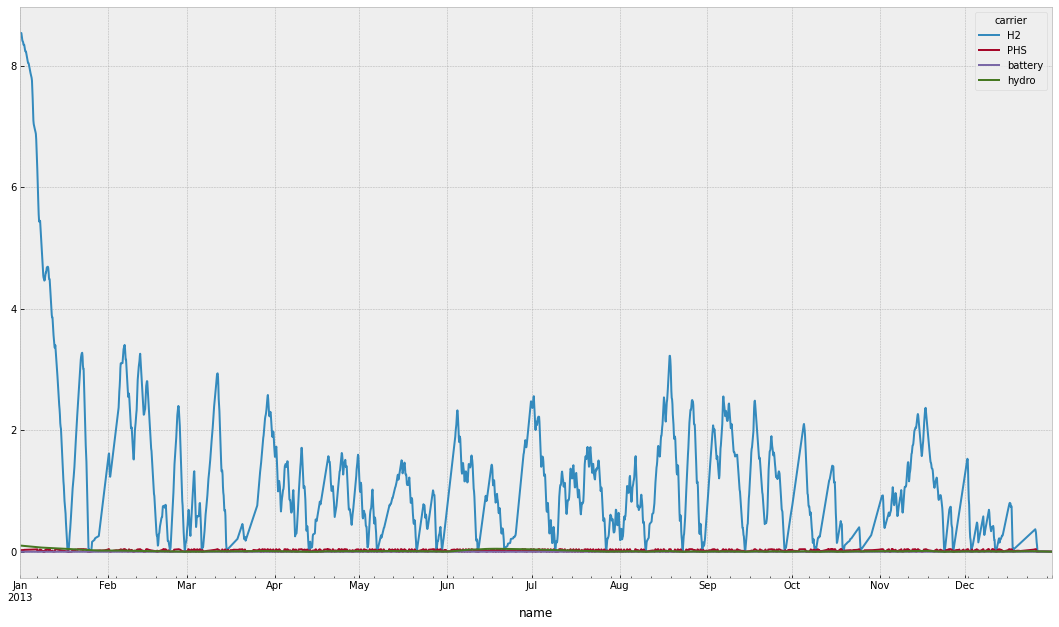

In [11]:
n = n_de_rh

fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5, forward=True)

e = pd.concat((n.stores_t.e.groupby(n.stores.carrier,axis=1).sum(),
               n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier,axis=1).sum()),axis=1)

e = e/1e6
#e.drop(e.columns[e.abs().max() < 1e6],axis=1,inplace=True)

e.plot(ax=ax)

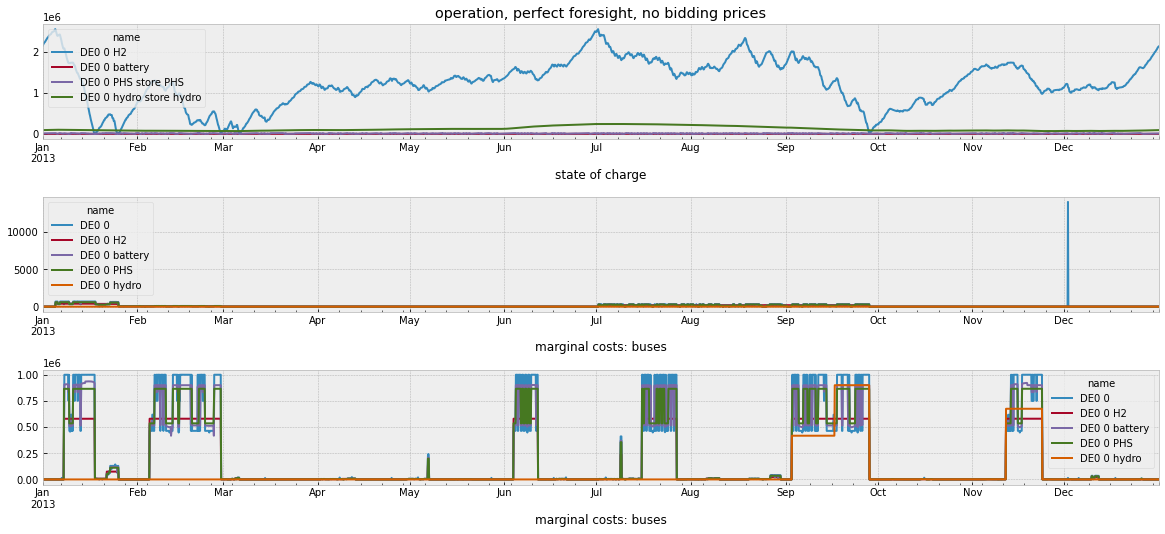

In [12]:
where='2013'

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(20,8))
plt.subplots_adjust(top = 0.9, bottom=0.1, hspace=.5, wspace=0)

n_op.stores_t.e.filter(like='DE0 0').loc[where].plot(ax=ax1)
ax1.set_title('operation, perfect foresight, no bidding prices')
ax1.set_xlabel('state of charge')

n_op.buses_t.marginal_price.filter(like='DE0 0').loc[where].plot(ax=ax2)
ax2.set_xlabel('marginal costs: buses')

n_rh_sp_2w.buses_t.marginal_price.filter(like='DE0 0').loc[where].plot(ax=ax3)
ax3.set_xlabel('marginal costs: buses')

#fig.savefig(f'../plots/01-operation.jpeg')
plt.show()

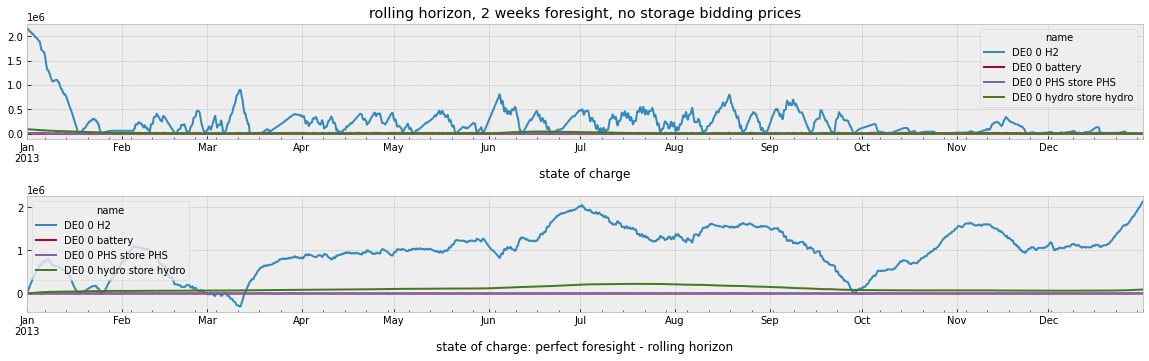

In [13]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(20,5))
plt.subplots_adjust(top = 0.9, bottom=0.1, hspace=.5, wspace=0)

n_de_rh.stores_t.e.filter(like='DE0 0').plot(ax=ax1)
ax1.set_title('rolling horizon, 2 weeks foresight, no storage bidding prices')
ax1.set_xlabel('state of charge')

(n_op.stores_t.e.filter(like='DE0 0')-n_de_rh.stores_t.e.filter(like='DE0 0')).plot(ax=ax2)
ax2.set_xlabel('state of charge: perfect foresight - rolling horizon')

#fig.savefig(f'../plots/02-rh.jpeg')
plt.show()

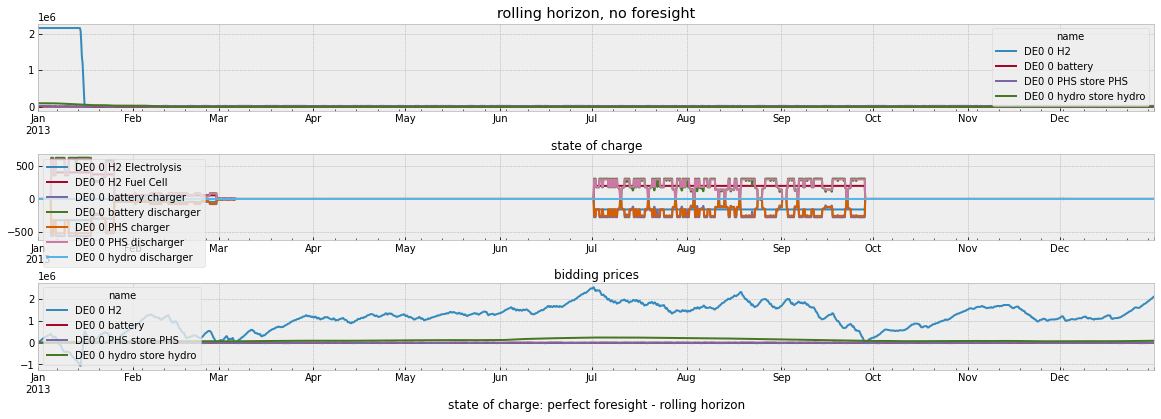

In [14]:
where='2013'

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(20,6))
plt.subplots_adjust(top = 0.9, bottom=0.1, hspace=.5, wspace=0)

n_rh_sp_3h.stores_t.e.filter(like='DE0 0').loc[where].plot(ax=ax1)
ax1.set_title('rolling horizon, no foresight')
ax1.set_xlabel('state of charge')

n_rh_sp_3h.links_t.marginal_cost.filter(like='DE0 0').loc[where].plot(ax=ax2)
ax2.set_xlabel('bidding prices')

(n_op.stores_t.e.filter(like='DE0 0')-n_rh_sp_3h.stores_t.e.filter(like='DE0 0')).plot(ax=ax3)
ax3.set_xlabel('state of charge: perfect foresight - rolling horizon')

#fig.savefig(f'../plots/03-rh-h2.jpeg')
plt.show()

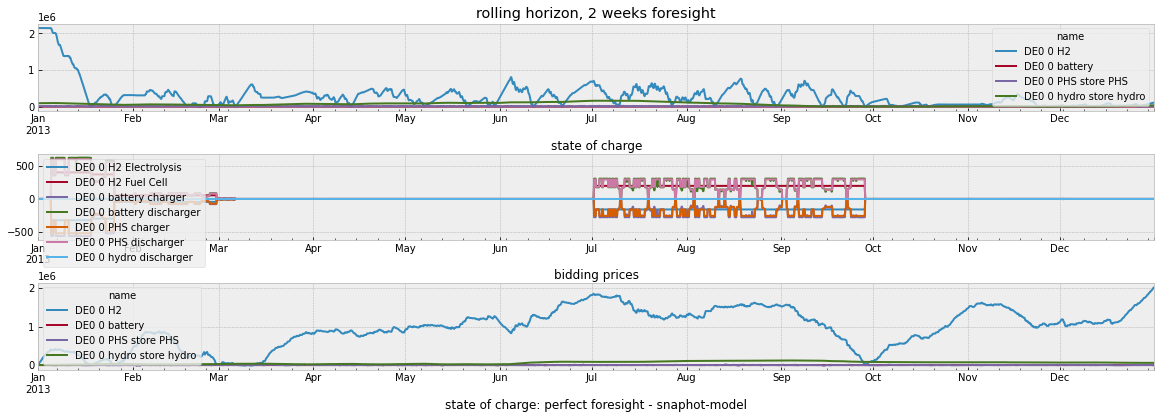

In [15]:
where='2013'

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(20,6))
plt.subplots_adjust(top = 0.9, bottom=0.1, hspace=.5, wspace=0)

n_rh_sp_2w.stores_t.e.filter(like='DE0 0').loc[where].plot(ax=ax1)
ax1.set_title('rolling horizon, 2 weeks foresight')
ax1.set_xlabel('state of charge')

n_rh_sp_2w.links_t.marginal_cost.filter(like='DE0 0').loc[where].plot(ax=ax2)
ax2.set_xlabel('bidding prices')

(n_op.stores_t.e.filter(like='DE0 0')-n_rh_sp_2w.stores_t.e.filter(like='DE0 0').filter(like='DE0 0')).plot(ax=ax3)
ax3.set_xlabel('state of charge: perfect foresight - snaphot-model')

#fig.savefig(f'../plots/{version}/04-rh-h2+b.jpeg')
plt.show()